## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [4]:
# YOUR CODE HERE
df = pd.read_csv('NBA.csv')
df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [9]:
# YOUR CODE HERE
X = df[['mp']]
y = df['win_rating']

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

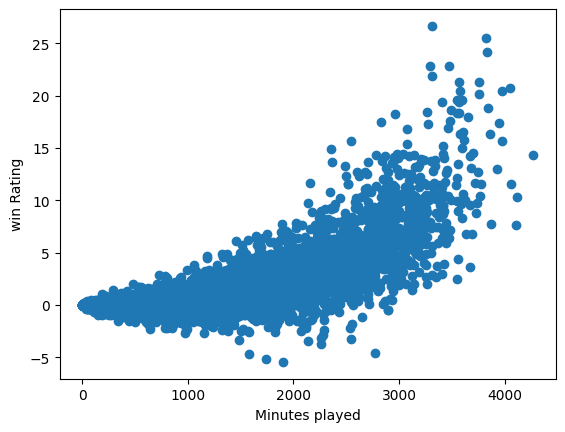

In [6]:
# YOUR CODE HERE
plt.scatter(x=X, y=y)
plt.xlabel('Minutes played')
plt.ylabel('win Rating')
plt.show()

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [20]:
# YOUR CODE HERE
model = LinearRegression()

cv_results = cross_validate(model,X , y, cv=5)


❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [21]:
# YOUR CODE HERE
min_score = cv['test_score'].min()

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [22]:
# YOUR CODE HERE
max_score = cv['test_score'].max()

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [23]:
# YOUR CODE HERE
mean_score = cv['test_score'].mean()

In [33]:
cv

{'fit_time': array([0.00438786, 0.00653386]),
 'score_time': array([0.00213718, 0.00214314]),
 'test_score': array([0.55607054, 0.56112015])}

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [31]:
import numpy as np

k_values = np.arange(2,20,1)
len(k)

18

Text(0.5, 1.0, 'Score vs. K folds')

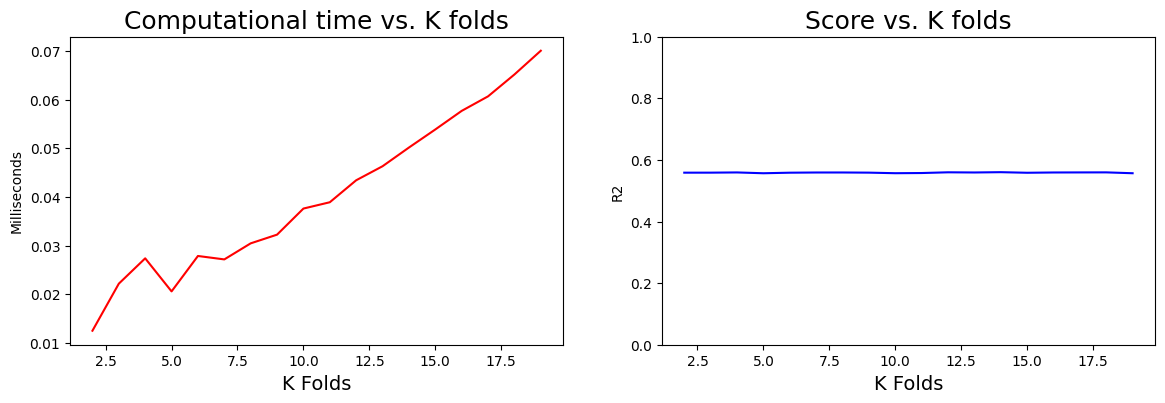

In [58]:
# YOUR CODE HERE

computational_time = []
score = []
for k in k_values:
    cv = cross_validate(model, X, y, cv=k)
    computational_time.append(sum(cv['fit_time']) + sum(cv['score_time']))
    score.append(cv['test_score'].mean())

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.plot(k_values, computational_time, color = 'red')
plt.xlabel('K Folds', fontsize = 14)
plt.ylabel('Milliseconds')
plt.title("Computational time vs. K folds", fontsize = 18)

plt.subplot(1,2,2)
plt.plot(k_values, score, color = 'blue')
plt.xlabel('K Folds', fontsize = 14)
plt.ylabel('R2')
plt.ylim(0,1)
plt.title("Score vs. K folds", fontsize = 18)


In [ ]:
# YOUR CODE HERE

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [59]:
# YOUR CODE HERE
model = model.fit(X, y)

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [77]:
# YOUR CODE HERE
slope = model.coef_[0]
slope

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [75]:
# YOUR CODE HERE
intercept = model.intercept_
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [78]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.27s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [80]:
# YOUR CODE HERE
prediction = model.predict([[1000]])
prediction

/Users/bita/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.056205])

### ☑️ Test your code

In [81]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.22s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

<AxesSubplot:xlabel='pacing', ylabel='win_rating'>

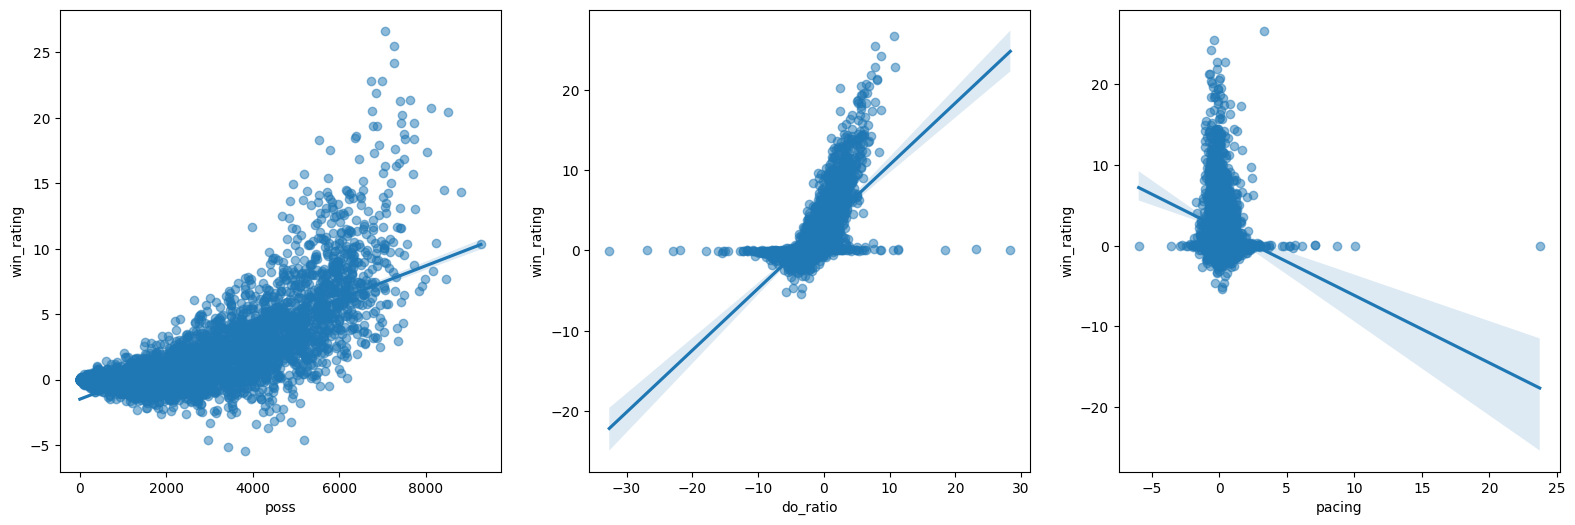

In [89]:
# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df, y='win_rating', x='poss', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='do_ratio', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='pacing', ax=axes[2], scatter_kws={'alpha':0.5})

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [90]:
# YOUR CODE HERE
X = df[['mp', 'poss']]

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [95]:
# YOUR CODE HERE
cv_2 =  cross_val_score(model, X, y, cv=5)

mean_2_feat_score = cv_2.mean()
mean_2_feat_score


0.557266329773699

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())

You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁